In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv('spam.csv',encoding='ISO-8859-1')
data1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data=data1[['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
data['v1']=pd.factorize(data['v1'])[0]
data.head()

C:\Users\jenin joy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
x=data['v2']
y=data['v1']

In [8]:
from nltk.corpus import names              #it contain all the names.      
all_names=set(names.words())
from nltk.stem import WordNetLemmatizer         #it will lemmatize all the noun but not verb.
lemmatizer=WordNetLemmatizer()

In [9]:
def letters_only(astr):                   #it will remove all the numbers and return only words 
    return astr.isalpha()

In [10]:
cleaned=[]
for post in data['v2']:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
                                                for word in post.split()
                                                if letters_only(word) and word not in all_names]))


In [11]:
cleaned

['go until jurong available only in bugis n great world la e cine there got amore',
 'ok joking wif u',
 'free entry in a wkly comp to win fa cup final tkts text fa to to receive entry txt apply',
 'u dun say so early u c already then',
 'nah i think he go to he life around here though',
 'freemsg hey there darling been now and no word like some fun you up for it tb xxx std chgs to to rcv',
 'even my brother is not like to speak with they treat me like aid',
 'a per your request melle minnaminunginte nurungu ha been set a your callertune for all press to copy your friend callertune',
 'a a valued network customer you have been selected to receivea prize to claim call claim code valid hour',
 'had your mobile month or u r entitled to update to the latest colour mobile with camera for call the mobile update co free on',
 'gonna be home soon and i want to talk about this stuff anymore cried enough',
 'six chance to win from to pound and send to cost tsandcs apply reply hl info',
 'you hav

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english',max_features=600)
x2=cv.fit_transform(cleaned)
x2

<5572x600 sparse matrix of type '<class 'numpy.int64'>'
	with 19210 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.30,random_state=0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=1)
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [19]:
y_pred=mnb.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[1399   35]
 [  31  207]]
0.9605263157894737
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1434
          1       0.86      0.87      0.86       238

avg / total       0.96      0.96      0.96      1672

0.9226703233594693


In [25]:
spam = data[data['v1'] == 1]
ham = data[data['v1'] ==0]

In [28]:
import nltk
from nltk.corpus import stopwords

In [38]:
spam_words=' '
for val in spam['v2']:
    v2 = val.lower()
    tokens = nltk.word_tokenize(v2)
    for words in tokens:
        spam_words = spam_words + words + ' ' 


In [39]:
spam_words

" free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question ( std txt rate ) t & c 's apply 08452810075over18 's freemsg hey there darling it 's been 3 week 's now and no word back ! i 'd like some fun you up for it still ? tb ok ! xxx std chgs to send , å£1.50 to rcv winner ! ! as a valued network customer you have been selected to receivea å£900 prize reward ! to claim call 09061701461. claim code kl341 . valid 12 hours only . had your mobile 11 months or more ? u r entitled to update to the latest colour mobiles with camera for free ! call the mobile update co free on 08002986030 six chances to win cash ! from 100 to 20,000 pounds txt > csh11 and send to 87575. cost 150p/day , 6days , 16+ tsandcs apply reply hl 4 info urgent ! you have won a 1 week free membership in our å£100,000 prize jackpot ! txt the word : claim to no : 81010 t & c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub : to use your credit , click the w

In [40]:
ham_words=' '
for val in ham['v2']:
    v2 = val.lower()
    tokens = nltk.word_tokenize(v2)
    for words in tokens:
        ham_words = ham_words + words + ' ' 

In [41]:
ham_words

" go until jurong point , crazy.. available only in bugis n great world la e buffet ... cine there got amore wat ... ok lar ... joking wif u oni ... u dun say so early hor ... u c already then say ... nah i do n't think he goes to usf , he lives around here though even my brother is not like to speak with me . they treat me like aids patent . as per your request 'melle melle ( oru minnaminunginte nurungu vettam ) ' has been set as your callertune for all callers . press *9 to copy your friends callertune i 'm gon na be home soon and i do n't want to talk about this stuff anymore tonight , k ? i 've cried enough today . i 've been searching for the right words to thank you for this breather . i promise i wont take your help for granted and will fulfil my promise . you have been wonderful and a blessing at all times . i have a date on sunday with will ! ! oh k ... i 'm watching here : ) eh u remember how 2 spell his name ... yes i did . he v naughty make until i v wet . fine if thatåõs t

In [42]:
from wordcloud import WordCloud

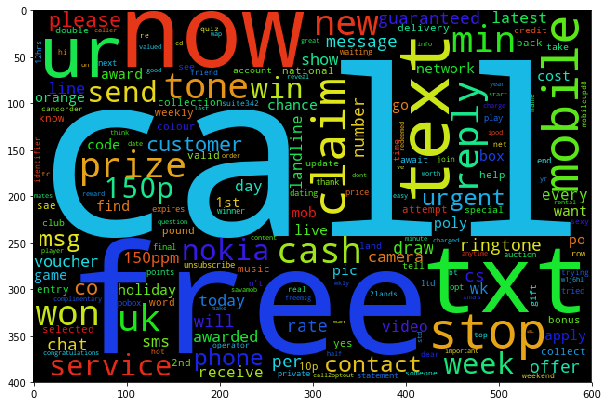

In [49]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
plt.figure(figsize=(10,10))
plt.imshow(spam_wordcloud)

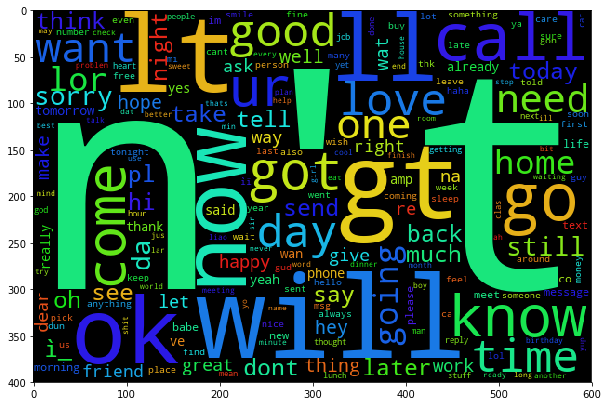

In [50]:
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)
plt.figure(figsize=(10,10))
plt.imshow(ham_wordcloud)